In [1]:
!python libraries.py

2024-08-29 22:46:24,465 - INFO - Upgrading pip...
2024-08-29 22:46:24,466 - INFO - Running pip command: install --upgrade pip
2024-08-29 22:46:25,855 - INFO - Command 'install --upgrade pip' executed successfully.
2024-08-29 22:46:25,855 - INFO - pip upgraded successfully.
2024-08-29 22:46:25,855 - INFO - Installing library numpy...
2024-08-29 22:46:25,855 - INFO - Running pip command: install numpy
2024-08-29 22:46:26,965 - INFO - Command 'install numpy' executed successfully.
2024-08-29 22:46:26,965 - INFO - numpy installed successfully.
2024-08-29 22:46:26,965 - INFO - Installing library pandas...
2024-08-29 22:46:26,965 - INFO - Running pip command: install pandas
2024-08-29 22:46:28,106 - INFO - Command 'install pandas' executed successfully.
2024-08-29 22:46:28,106 - INFO - pandas installed successfully.
2024-08-29 22:46:28,106 - INFO - Installing library matplotlib...
2024-08-29 22:46:28,106 - INFO - Running pip command: install matplotlib
2024-08-29 22:46:29,297 - INFO - Comman

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 421423276407912430
xla_global_id: -1
]


In [4]:
import os
from config import Config

config = Config(
    data_dir='./data',
    train_data_subdir='train/',
    val_data_subdir='test/',
    test_data_subdir='test/',
    models_dir='./models',
    dl_models_subdir='dl/',
    ml_models_subdir='ml/'
)

data_dir = ['.ipynb_checkpoints', 'features.txt', 'target.txt', 'test', 'train', 'val']
train_data_dir = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
val_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
test_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
models_dir = ['dl', 'features.txt', 'ml', 'targets.txt']
dl_models_dir = ['rnn_best.keras', 'rnn_model.keras', 'soc_estimation_dl.keras']
ml_models_dir = ['soc_estimation_ml_decisiontree.sav', 'soc_estimation_ml_lregression.sav', 'soc_estimation_ml_nnregression.sav']


In [5]:
import pandas as pd
import numpy as np

## Training Data

In [6]:
train_data_filename = os.listdir(config.get_train_data_dir())[0]
train_data_path = os.path.join(config.get_train_data_dir(), train_data_filename)
train_data = pd.read_csv(train_data_path)
train_data.columns

Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')

In [7]:
cols = set(train_data.columns)
targets = ['SOC']
targets = set(targets)
features = cols - targets
targets = list(targets)
features = list(features)
print(f'features = {features}')
print(f'targets = {targets}')

targets_filename = 'targets.txt'
targets_path = os.path.join(config.get_data_dir(), targets_filename)
with open(targets_path, 'w') as file:
    for i in range(len(targets)):
        file.write(f'{targets[i]}\n')

features_filename = 'features.txt'
features_path = os.path.join(config.get_data_dir(), features_filename)
with open(features_path, 'w') as file:
    for i in range(len(features)):
        file.write(f'{features[i]}\n')

features = ['Temp', 'I', 'V', 'I_avg', 'V_avg']
targets = ['SOC']


### Extracting Features for Training
In this cell, we extract specific features from the training data for use in model training

In [8]:
X_train = train_data[features].values
X_train.shape

(669956, 5)

In [9]:
X_train

array([[0.30310108, 0.75102009, 0.38514793, 0.75102009, 0.38514793],
       [0.30459129, 0.75102009, 0.38515183, 0.75102009, 0.38514988],
       [0.3060815 , 0.75102009, 0.38515573, 0.75102009, 0.38515183],
       ...,
       [0.00847709, 0.75102009, 0.47884278, 0.75102009, 0.45983939],
       [0.00847709, 0.75102009, 0.4789612 , 0.75102009, 0.45997861],
       [0.00847709, 0.75102009, 0.4789612 , 0.75102009, 0.46011672]])

### Extracting Target Variable for Training

In this cell, we extract the target variable from the training data

In [10]:
y_train = train_data[targets].values
y_train.shape

(669956, 1)

In [11]:
y_train

array([[0.20641667],
       [0.20641667],
       [0.20641667],
       ...,
       [0.28324333],
       [0.28324333],
       [0.28324333]])

## Validation Data

In [12]:
val_data_filename = os.listdir(config.get_val_data_dir())[3]
val_data_path = os.path.join(config.get_val_data_dir(), val_data_filename)
val_data = pd.read_csv(val_data_path)

In [13]:
X_val = val_data[features].values
y_val = val_data[targets].values

## Data Normalization

In [14]:
import utils

### Normalizing Feature Data

In this cell, we normalize the feature data for training and validation:
- `normalized_X_train = utils.normalize(X_train)` and `normalized_X_val = utils.normalize(X_val)`
    - Applies normalization to the feature set `X_train` and `X_val` using the `normalize` function from the `utils` module.
    - Normalization typically scales the features to a standard range, improving the performance and convergence of learning algorithms.

This step ensures that the feature data is on a comparable scale, which can be crucial for many learning models.

In [15]:
normalized_X_train = utils.normalize(X_train)
normalized_X_train

array([[-1.        ,  1.        , -0.63365322,  1.        , -0.63365322],
       [-1.        ,  1.        , -0.63908898,  1.        , -0.63909772],
       [-1.        ,  1.        , -0.64456116,  1.        , -0.64457869],
       ...,
       [-1.        ,  1.        ,  0.26690492,  1.        ,  0.21572031],
       [-1.        ,  1.        ,  0.26722387,  1.        ,  0.21609528],
       [-1.        ,  1.        ,  0.26722387,  1.        ,  0.21646728]])

In [16]:
normalized_X_val = utils.normalize(X_val)
normalized_X_val

array([[ 0.57551079, -1.        ,  1.        , -1.        ,  1.        ],
       [ 0.58256774, -1.        ,  0.99571585, -0.99130679,  1.        ],
       [ 0.55815534, -1.        ,  0.99642139, -0.99419975,  1.        ],
       ...,
       [ 1.        ,  0.44653221, -0.98163938,  0.44653221, -1.        ],
       [ 1.        ,  0.44006032, -0.98183573,  0.44006032, -1.        ],
       [ 1.        ,  0.44002819, -0.98194943,  0.44002819, -1.        ]])

# FNN
A feedforward neural network (FNN) is characterized by direction of the flow of information between its layers. Its flow is uni-directional, meaning that the information in the model flows in only one direction (forward) from the input nodes, through the hidden nodes and to the output nodes, in contrast to recurrent neural networks, which have a bi-directional flow.

In [17]:
epochs = 50
no_training = 3
mini_batch_size = 64

## FNN Structure

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from custom import CustomLeakyReLU, CustomClippedReLU

In [19]:
model = keras.Sequential([
    layers.Input(shape=(len(features),)),
    layers.Dense(
        256,
        activation=keras.activations.relu
    ),
    layers.Dense(
        256,
        activation=keras.activations.relu
    ),
    layers.Dense(
        128,
        activation=keras.activations.relu
    ),
    layers.Dense(
        len(targets),
        activation=keras.activations.linear
    )
])

In [20]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=40000,
    decay_rate=0.9,
    staircase=False
)

optimizer = keras.optimizers.SGD(
    learning_rate=lr_schedule
)

In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [22]:
model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
for t in range(no_training):
    print(f'Start of the new training session...')
    print(f'Training session {t+1}/{no_training}')
    history = model.fit(
        x=normalized_X_train,
        y=y_train,
        epochs=epochs,
        batch_size=mini_batch_size,
        validation_data=(
            normalized_X_val, 
            y_val
        ),
        callbacks = [
            early_stopping
        ],
        verbose=1,
    )
    print('\n')

Start of the new training session...
Training session 1/3
Epoch 1/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 10s 945us/step - loss: 0.0323 - val_loss: 0.0104
Epoch 2/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 9s 902us/step - loss: 0.0084 - val_loss: 0.0091
Epoch 3/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 4/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0070 - val_loss: 0.0076
Epoch 5/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 10s 991us/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 7/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 8/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 9/50
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 10s 996us/step - loss: 0.0052 - val_loss: 0.0055
Epoch 10/50
 2266/10469 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0051

KeyboardInterrupt: 

In [25]:
saved_model_name = 'rnn_model.keras'
saved_model_path = os.path.join(config.get_dl_models_dir(), saved_model_name)
model.save(saved_model_path)

# Analyzing Training History

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
5,0.001626,0.000958,5
6,0.001625,0.000953,6
7,0.001624,0.000960,7
8,0.001623,0.000960,8
9,0.001622,0.000956,9


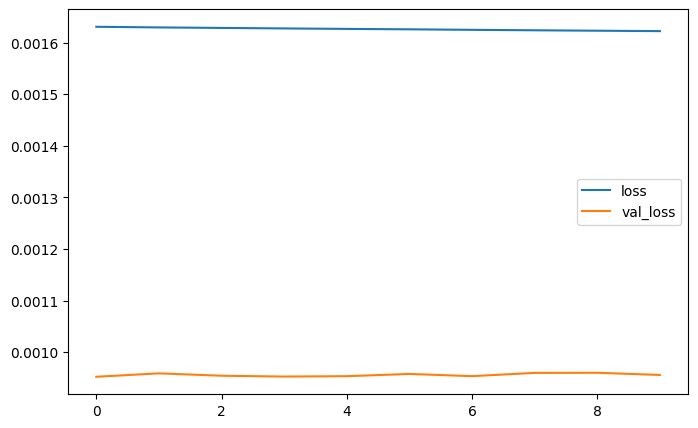

In [27]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show() 